In [ ]:
#Console commands to install
%pip install seaborn
%pip install folium
%pip install pandas matplotlib requests
%matplotlib inline

In [2]:
#Importing needed packages 

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import requests
import io

In [3]:
#Importing the data

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
response = requests.get(URL)
df = pd.read_csv(URL)
print(df.head())

        Date  Year Month  Recession  Consumer_Confidence  Seasonality_Weight  \
0  1/31/1980  1980   Jan          1               108.24                0.50   
1  2/29/1980  1980   Feb          1                98.75                0.75   
2  3/31/1980  1980   Mar          1               107.48                0.20   
3  4/30/1980  1980   Apr          1               115.01                1.00   
4  5/31/1980  1980   May          1                98.72                0.20   

       Price  Advertising_Expenditure  Competition     GDP  Growth_Rate  \
0  27483.571                     1558            7  60.223     0.010000   
1  24308.678                     3048            4  45.986    -0.309594   
2  28238.443                     3137            3  35.141    -0.308614   
3  32615.149                     1653            7  45.673     0.230596   
4  23829.233                     1319            4  52.997     0.138197   

   unemployment_rate  Automobile_Sales     Vehicle_Type        City 

In [4]:
df.describe()

Year   Recession  Consumer_Confidence  Seasonality_Weight  \
count   528.000000  528.000000           528.000000          528.000000   
mean   2001.500000    0.214015           101.140170            0.575795   
std      12.710467    0.410526            10.601154            0.454477   
min    1980.000000    0.000000            73.900000            0.000000   
25%    1990.750000    0.000000            94.035000            0.250000   
50%    2001.500000    0.000000           100.740000            0.500000   
75%    2012.250000    0.000000           108.240000            0.750000   
max    2023.000000    1.000000           131.670000            1.500000   

              Price  Advertising_Expenditure  Competition         GDP  \
count    528.000000               528.000000   528.000000  528.000000   
mean   24964.991956              3067.456439     6.064394   40.073903   
std     4888.073433              1139.564637     1.968350   16.249714   
min     8793.663000              1009.000000     3.000000   12.508000   
25%    21453.300500              2083.500000     4.000000   27.237500   
50%    25038.691500              3072.000000     6.000000   39.214500   
75%    28131.684750              4067.250000     8.000000   53.506500   
max    44263.657000              4983.000000     9.000000   70.374000   

       Growth_Rate  unemployment_rate  Automobile_Sales  
count   528.000000         528.000000        528.000000  
mean     -0.242001           2.453977       2352.718068  
std       0.861268           1.119019       1645.321284  
min      -4.227601           1.000000        102.000000  
25%      -0.574049           1.600000        793.950000  
50%      -0.013162           2.300000       2182.600000  
75%       0.388932           2.900000       3614.800000  
max       0.815074           6.000000      21147.000000

In [5]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

### Line Graph for Sales

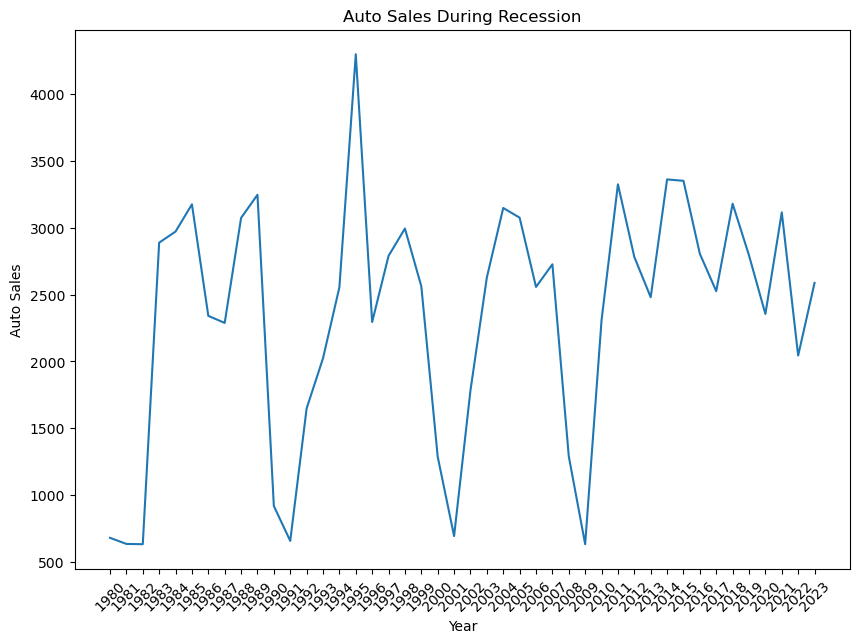

In [6]:
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()

plt.figure(figsize = (10,7))
df_line.plot(kind = 'line')
plt.xlabel('Year')
plt.ylabel('Auto Sales')
plt.title("Auto Sales During Recession")

#Adding ticks for every year
years = list(range(1980, 2024))
plt.xticks(ticks=years, rotation=45)

plt.show()

### Sales by Vehicle Type

In [7]:
#Avergae sales for each group
df_Mline = df.groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()
df_Mline.set_index('Year', inplace=True)
df_Mline = df_Mline.groupby(['Vehicle_Type'])['Automobile_Sales']

#Make line graph 
df_Mline.plot(kind='line')

#Adding titles
plt.xlabel('Year')
plt.ylabel('Vehicle Type')
plt.title('Sales Trend Vehicle-wise during Recession')

plt.legend()
plt.show()

### Recession versus Nonrecession Bar Chart

In [8]:
#change date to datetime type
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
recession_years = [2008, 2009, 2020]
df['Recession'] = df['Year'].apply(lambda x: 'Recession' if x in recession_years else 'Non-Recession')

#Average of each vehicle type 
df_grped = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

#Making the barplot
plt.figure(figsize=(12, 8))
df_barplt = sns.barplot(
    x='Vehicle_Type', 
    y='Automobile_Sales',
    hue='Recession',
    data=df_grped,
    palette={'Recession': 'red', 'Non-Recession': 'green'}
)

#Adding labels and Title
plt.xlabel('Vehicle Type')
plt.ylabel('Sales')
plt.title("Recession vs Normal")

Text(0.5, 1.0, 'Recession vs Normal')

### Recession versus Nonrecession Line Graphs

Index(['Recession', 'Year', 'GDP'], dtype='object')


C:\Users\Houst\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Houst\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Houst\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Houst\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

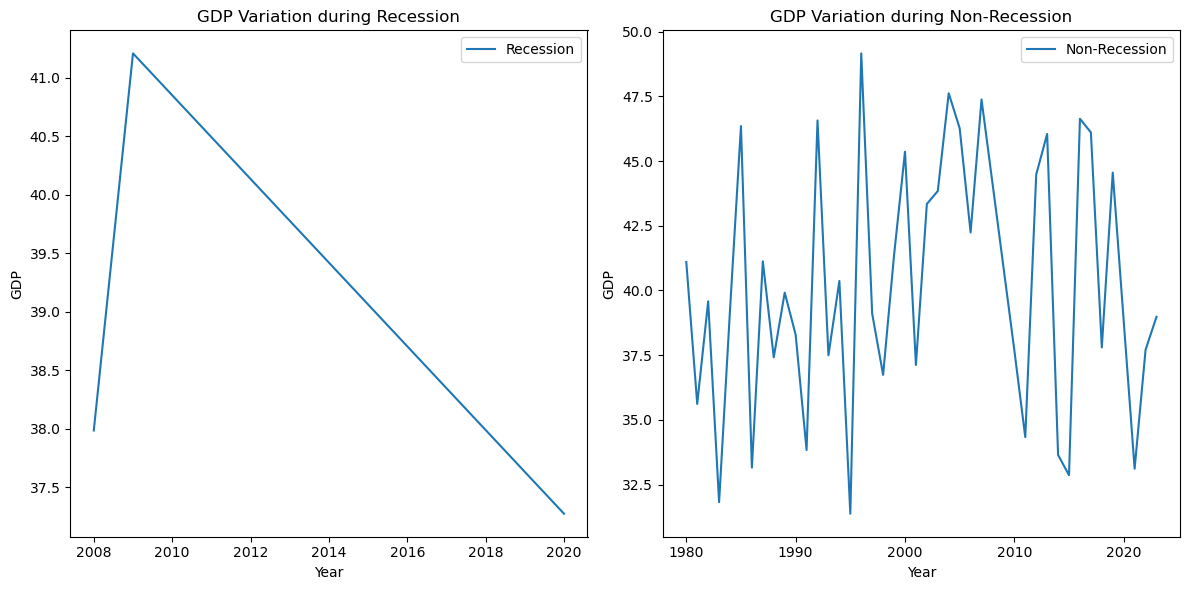

In [10]:
recession_years = [2008, 2009, 2020]
df['Recession'] = df['Year'].apply(lambda x: 1 if x in recession_years else 0)

#group recession data and find the average
df_grped = df.groupby(['Recession', 'Year'])['GDP'].mean().reset_index()
print(df_grped.columns)

plt.figure(figsize=(12, 6))

#first plot to show gdp in recession
plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='GDP', data=df_grped[df_grped['Recession'] == 1], label='Recession')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP Variation during Recession')
plt.legend()

#second plot to show gdp in nonrecession
plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='GDP', data=df_grped[df_grped['Recession'] == 0], label='Non-Recession')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP Variation during Non-Recession')
plt.legend()

plt.tight_layout()
plt.show()

### Seasonality Bubble Chart

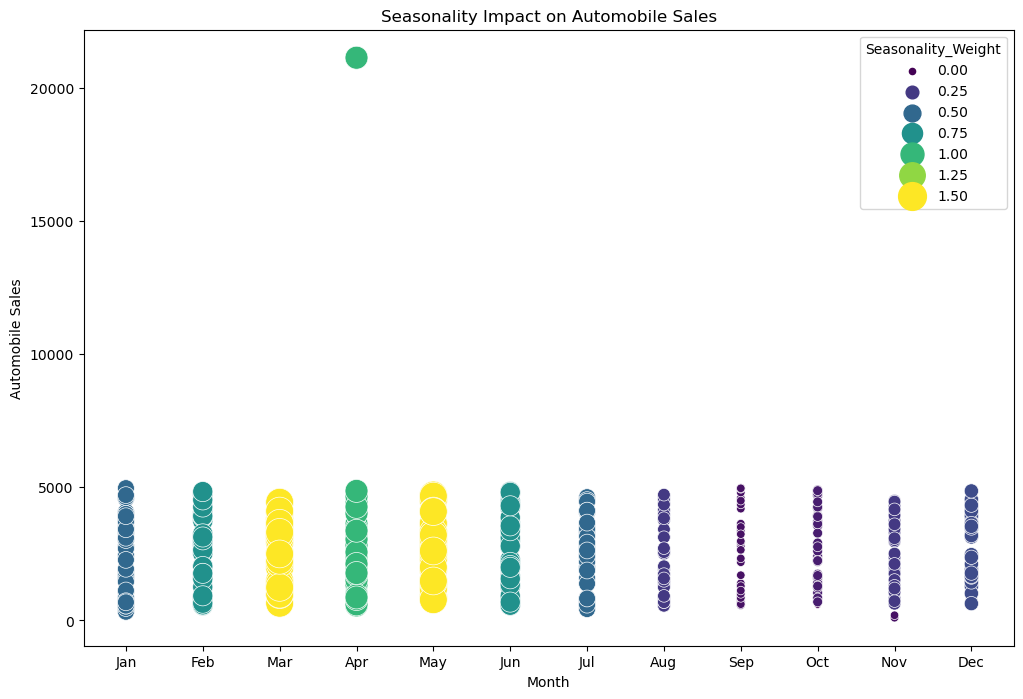

In [11]:
#Set to zero to select the rows that are not recession years
non_rec_data = df[df['Recession'] == 0]

#making the bubbleplot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=non_rec_data, 
    x='Month', 
    y='Automobile_Sales', 
    size='Seasonality_Weight', 
    hue='Seasonality_Weight', 
    palette='viridis',  
    sizes=(20, 400),  
    legend=True  
)

#adding labels
plt.xlabel('Month')
plt.ylabel('Automobile Sales')
plt.title('Seasonality Impact on Automobile Sales')

plt.show()

### Consumer Confidence and Car Sales over Recession

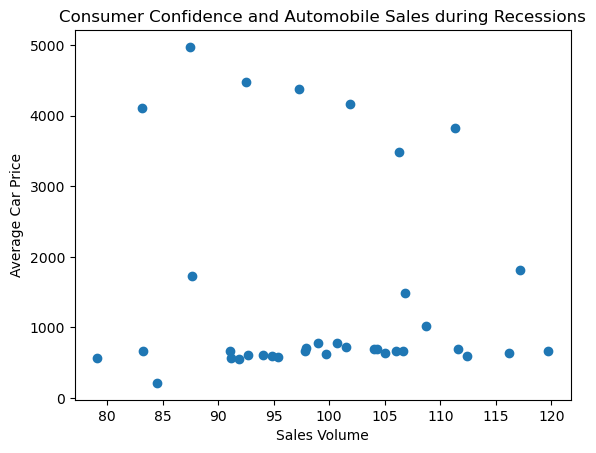

In [12]:
#Grabbing data that is only in recession period
rec_data = df[df['Recession'] == 1]

#making the scatter plot
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])
    
#adding plot
plt.xlabel('Sales Volume')
plt.ylabel('Average Car Price')
plt.title('Consumer Confidence and Automobile Sales during Recessions')

plt.show()

### Average Car Price and Sales

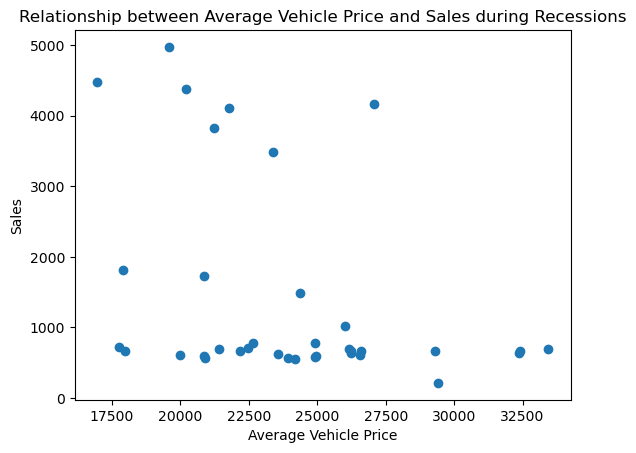

In [13]:
#grabbing data that is in a recession period
rec_data = df[df['Recession'] == 1]

#making scatterplot
plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'])
    
#adding plot labels
plt.xlabel('Average Vehicle Price')
plt.ylabel('Sales')
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')

plt.show()

### Advertising Expenditure Pie Chart

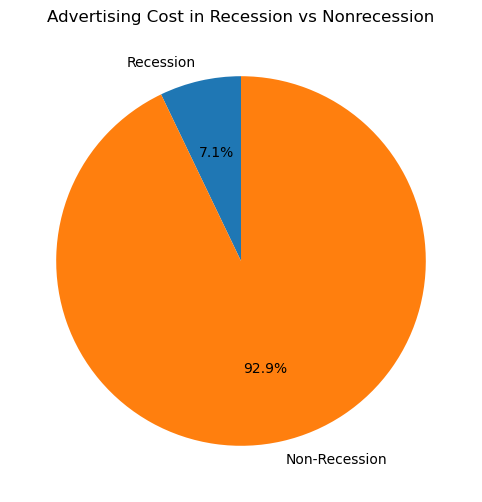

In [14]:
#separating recession and nonrecession data
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

#calculate total advertising price
RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()

#make the pie chart
plt.figure(figsize=(8, 6))
labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

#adding a title
plt.title('Advertising Cost in Recession vs Nonrecession')

plt.show()

### Advertising Price by Car Type

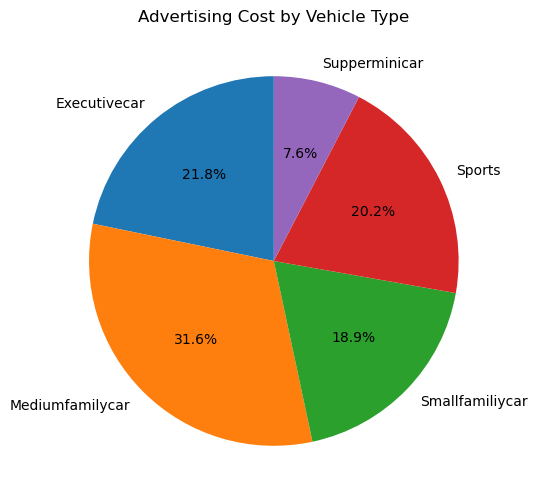

In [15]:
#filter the data for recession periods
Rdata = df[df['Recession'] == 1]

#calculate sales total by vehicle type
VTexpenditure = Rdata.groupby('Vehicle_Type')['Automobile_Sales'].sum()

#making the pie chart
plt.figure(figsize=(8, 6))

labels = VTexpenditure.index
sizes = VTexpenditure.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

#adding a title
plt.title('Advertising Cost by Vehicle Type')

plt.show()

### Unemployement Rate and Vehicle Sales

C:\Users\Houst\AppData\Local\Temp\ipykernel_49348\2499828212.py:2: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df_rec, x='Automobile_Sales', y='unemployment_rate',
C:\Users\Houst\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Houst\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


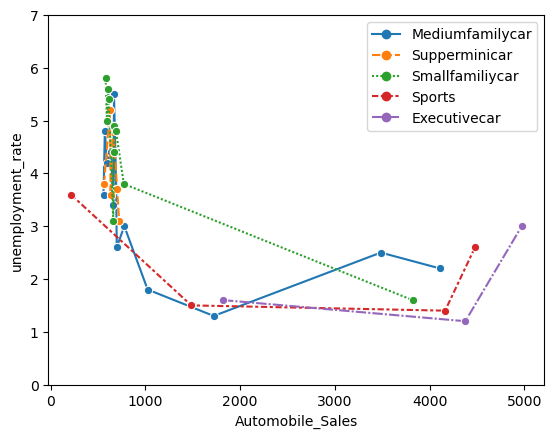

In [16]:
#grabbing the recession data
df_rec = df[df['Recession']==1]

#making the lineplot
sns.lineplot(data=df_rec, x='Automobile_Sales', y='unemployment_rate',
             hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)
plt.ylim(0, 7)

#adding a legend
plt.legend(loc='upper right')